In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dataset contain 891 rows with each having a 11 features. With 2 of features having float values, 5 of features having integer value and 5 of features having objects.


# **Data Description** 
from [kaggle](https://www.kaggle.com/c/titanic/data)

| Variable | Definition | Key |
|:---------|:-----------|:----|
| survival | Survival | 0 = No, 1 = Yes |
|pclass |Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| Age | Age in years | |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |	
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**  
pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  


# Categorical Feature:

| Nominal | Ordinal |
|:---------|:-------|
| Survived | Pcalss |
| Sex | |
| Embarked || 

# Numerical Feature:
| Continous | Discrete |
|:---------|:-------|
| Age | SibSp |
| Fare | Parch |
 

# Mixed Datatype Features

| Numeric/Alphanumeric | Alphanumeric|
|:---------------------|:-------------|
| Ticket | Cabin |


# Features containig null values

In [4]:
summ_df=pd.DataFrame(df.isnull().sum())
summ_df.reset_index(inplace=True)
summ_df.columns = ['Feature', "null count"]
summ_df["in %"] = (summ_df['null count']/len(df))*100
summ_df

,Feature,null count,in %
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Name,0,0.000000
4,Sex,0,0.000000
5,Age,177,19.865320
6,SibSp,0,0.000000
7,Parch,0,0.000000
8,Ticket,0,0.000000
9,Fare,0,0.000000


- Cabin > Age > Embarked features contain a number of null values in that order for the dataset.

# Distribution of numerical feature values across the samples?

In [60]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Fare_distribution')

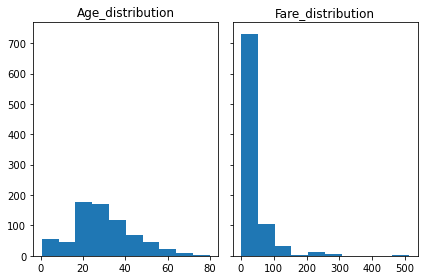

In [18]:
fig, axs = plt.subplots(1,2,sharey=True, tight_layout=True)
axs[0].hist(df['Age'])
axs[1].hist(df['Fare'])
axs[0].set_title("Age_distribution")
axs[1].set_title("Fare_distribution")

- Total samples are 891
- Survived is a categorical feature with 0 or 1 values.
- Around 38% passengers have survived
- Nearly 52% of the passengers had siblings and/or spouse aboard.
- About 38% pf passengers were accompanied with their parents.
- Fares have varied from 0-512, with majority of passenger paying around 0-50
- Majority of Age group is between 15-35.

# Distribution of Categorical features

In [19]:
df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kelly, Mrs. Florence ""Fannie""",male,347082,G6,S
freq,1,577,7,4,644


-	“Names” are unique across dataset
-	“Sex” have 2 unique vales “male” and “female” with 64.7% are male
-	“Embarked” having 3 unique value, with “S” port used by most of the passenger
-	Cabin have many duplicate value.  We can assume that several passengers shared the cabin


# Analyze by pivoting features 


Analyzing feature correlations by pivoting features against each other. We can only do this with feature having no empty values.  


In [4]:
df[['Pclass','Survived']].groupby("Pclass", as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- **Pclass** We observe a high survival rate among Pclass=1 and Survived 

In [5]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


- **Sex** We have observed that female having high survival rate with 74%

In [97]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [98]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Analyze by visualizing data:

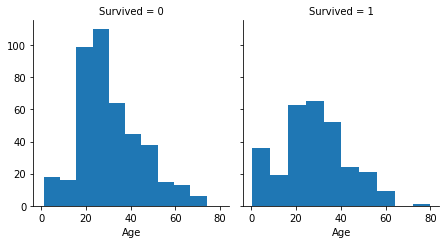

In [43]:
#Corelating Numarical features
fact_plt = sns.FacetGrid(df, col="Survived",height=3.5, aspect=0.9)
fact_plt.map(plt.hist, "Age", bins=10)

- Infants have (0-6) high survival rate
- oldest passenger (above75) have survived
- Majority of Passengers of age between 15-35 have lost their life


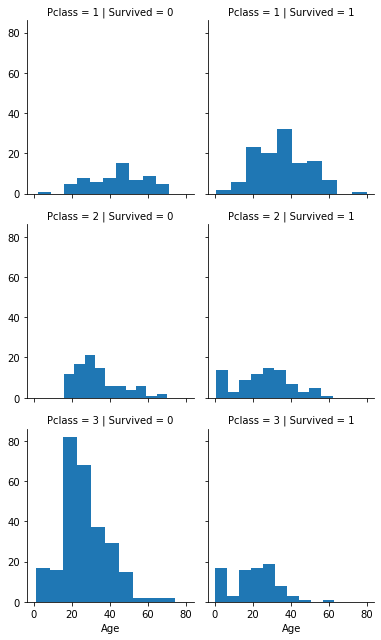

In [106]:
#- Corealting Numaricle with ordinal Features
fact_plt_1 = sns.FacetGrid(df, col="Survived", row="Pclass", height= 3, aspect=0.9)
fact_plt_1.map(plt.hist, "Age", bins=10)

- Majority of passengers in the Pclass 3 have not survived
- We can see few infants in Pclass 3 and 1 have managed to survive 
- All the infants in Pclass 2 have survived

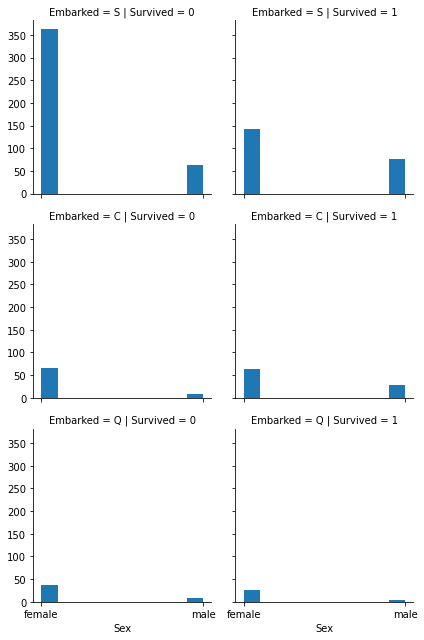

In [96]:
#- Corealting Numaricle with ordinal Features
fact_plt_1 = sns.FacetGrid(df, col="Survived", row="Embarked")
fact_plt_1.map(plt.hist, "Sex", bins=10)

- Female is leading in both servival and death rate in all the Embark ports. 

 # Extracting the new feature from existing

- analyzing if Name feature can be engineered to extract titles and test correlation between titles and survival.

In [50]:
com = [df]
for data in com:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [51]:
pd.crosstab(df["Title"], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


- Replacing rarely used titles with word "Rare"

In [60]:
for data in com:
        data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], "Rare")
        data['Title'] = data['Title'].replace('Mlle', 'Miss')
        data['Title'] = data['Title'].replace('Ms', 'Miss')
        data['Title'] = data['Title'].replace('Mme', 'Mrs')

In [63]:
df[['Title','Survived',"Age"]].groupby(['Title'], as_index=False).mean()

,Title,Survived,Age
0,Master,0.575000,4.574167
1,Miss,0.702703,21.845638
2,Mr,0.156673,32.368090
3,Mrs,0.793651,35.788991
4,Rare,0.347826,45.545455


- Title associates with Age group accuratly


- Titles like "Miss", "Mrs", mostly manages to survive.(>70%)

In [107]:
df["Age_range"] = pd.cut(df["Age"],6)
df['Fare_range'] = pd.cut(df["Fare"],6)

In [108]:
df[["Age_range","Survived"]].groupby(['Age_range'], as_index=False).mean().sort_values(by='Age_range', ascending=True)

,Age_range,Survived
0,"(0.34, 13.683]",0.591549
1,"(13.683, 26.947]",0.354839
2,"(26.947, 40.21]",0.428571
3,"(40.21, 53.473]",0.390000
4,"(53.473, 66.737]",0.348837
5,"(66.737, 80.0]",0.142857


In [109]:
df[["Fare_range","Survived"]].groupby(['Fare_range'], as_index=False).mean().sort_values(by='Fare_range', ascending=True)

,Fare_range,Survived
0,"(-0.512, 85.388]",0.352727
1,"(85.388, 170.776]",0.804348
2,"(170.776, 256.165]",0.636364
3,"(256.165, 341.553]",0.666667
4,"(341.553, 426.941]",NaN
5,"(426.941, 512.329]",1.000000


- Age group between 0.3 - 13 have higher survival rate.
- Passanger who Fare was around (85-170) have 80% survival rate
- Frare band bwtween 426-512 have 100 survival rate.

# Creating a new feature combining the existing feature

In [82]:
for data in com:
    data["FamilySize"] = data["SibSp"]+data['Parch']+1
    

In [87]:
df[['FamilySize','Survived']].groupby(["FamilySize"], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [88]:
for data in com:
    data["Isalone"] = 0
    data.loc[data["FamilySize"] ==1, "Isalone"] = 1

In [89]:
df[["Isalone","Survived"]].groupby(["Isalone"], as_index=False).mean()

,Isalone,Survived
0,0,0.505650
1,1,0.303538


# Completing a categorical feature
- As feature "Embarked" very less missing value, lets fill it up with most frequent value
- Age and Cabin has too many nan values, thus ignoring them.


In [93]:
freq_val = df.Embarked.dropna().mode()[0]
freq_val

'S'

In [94]:
for data in com:
    data['Embarked'] = data['Embarked'].fillna(freq_val)

In [95]:
df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009
